# Autoregressive models

For a description of autoregressive models, see <https://en.wikipedia.org/wiki/Autoregressive_model#Graphs_of_AR(p)_processes> .

This notebook implements AR(1) and AR(2) models.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Functions

In [86]:
def ar1_cv(corr, var, nb):
    """
    make an AR(1) process:
    corr: correlation between two consecutive variables, equal to phi
    var: variance of the variables
    nb: length of the output series
    return x: AR(1) process
    """
    phi = corr
    sigma = np.sqrt(var*(1-phi*phi))
    ## Spinup
    x0 = 0.
    eps = np.random.normal(0,sigma, 100)
    for i in range(100):
        x0=x0*phi+eps[i]
    ## AR(1)
    x = np.empty(nb)
    x[0] = x0
    eps = np.random.normal(0,sigma, nb-1)
    for i in range(nb-1):
        x[i+1]=x[i]*phi+eps[i]
    return x

def ar1(phi, std, nb):
    """
    make an AR(1) process:
    phi: AR coefficient
    std: standard deviation of the noise
    nb: length of the output series
    return x: AR(1) process
    """
    ## Spinup
    x0 = 0.
    eps = np.random.normal(0,std, 100)
    for i in range(100):
        x0=x0*phi+eps[i]
    ## AR(1)
    x = np.empty(nb)
    x[0] = x0
    eps = np.random.normal(0,std, nb-1)
    for i in range(nb-1):
        x[i+1]=x[i]*phi+eps[i]
    return x


def ar2(phi1, phi2, std, nb):
    """make an AR(2) process:
    phi1, phi2: AR coefficients
    std: standard deviation of the noise
    nb: length of the output series
    return x: AR(2) process"""
    ## Spinup
    x1, x2 = 0., 0.
    eps = np.random.normal(0,std, 100)
    for i in range(100):
        xb = x1*phi1 + x2*phi2 + eps[i]
        x1, x2 = x2, xb
    ## AR(1)
    x = np.empty(nb)
    x[0], x[1] = x1, x2
    eps = np.random.normal(0,std, nb-1)
    for i in range(1,nb-1):
        x[i+1] = x[i]*phi1 + x[i-1]*phi2 + eps[i]
    return x

## Making AR processes

In [172]:
z1 = ar1(0.99,0.1,1000)
z2 = ar2(0.8, 0.19, 0.1,1000)

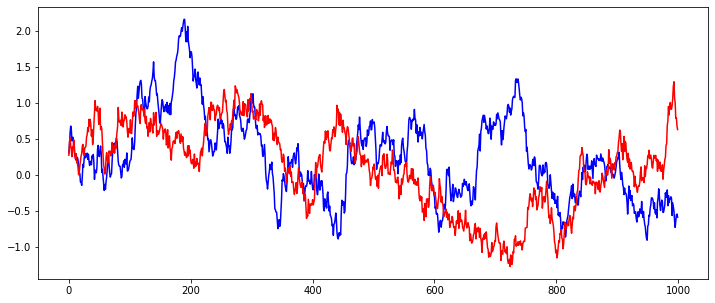

In [173]:
plt.figure(figsize=(12,5))
plt.plot(z1,'blue')
plt.plot(z2,'red')

## Autocorrelations

In [174]:
def autocorr(x):
    nx, mx, vx = len(x), np.mean(x), np.var(x)
    zz = np.correlate(x-mx, x-mx, mode = 'full')/nx/vx
    zz = zz[nx-1:]
    return zz

In [175]:
au1 = autocorr(z1)
au2 = autocorr(z2)

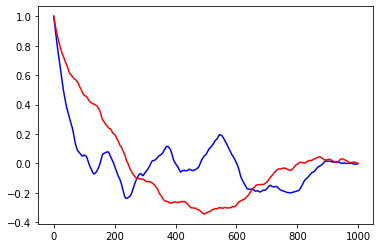

In [176]:
plt.plot(au1, 'b')
plt.plot(au2, 'r')